## Reporte Amplificador

En este documento se detallan los estudios realizados para caracterizar un amplificador. Las mediciones se tomaron con un dispositivo LIA SR380 DSP.  

#### Diagrama del amplificador
Diagrama del amplificador conectado al LT1167
<div>
<img src="figs/ampli_diagram.png" width="500" />
</div>
Configuracion de pines de LT1167
<div>
<img src="figs/pin_config.png" width="200"/>
</div>    
 Interior del LT1167   
<div>
<img src="figs/interior_LT1167.jpeg" width="500"/>
</div>


$$ R_L = 44,7 k\Omega \Rightarrow G = \frac{49.9k\Omega}{R_L} + 1 \sim 2,12 $$

In [2]:
#descargo los modulos y librerias que se utilizan 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os


In [3]:
#defino una funcion que contenga los detalles esteticos que quiero

def subplot_figure(ax,title,xlabel, ylabel, scale):
    ax.grid()
    ax.set_title(title,fontsize = 15)
    ax.set_xlabel(xlabel,fontsize = 15)
    ax.set_ylabel(ylabel,fontsize = 15)
    ax.set_xscale(scale)
    ax.tick_params(axis='both', labelsize=14)
    
def plot_figure(title,xlabel, ylabel, scale):
    fig = plt.figure(figsize=(7,5))
    plt.title(title,fontsize=20)
    plt.grid()
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.xscale(scale)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    return fig

## Primer Armonico
### Medición A
Para estudiar cada armónico, se realizan mediciones previas con el fin de analizar el ruido proveniente del dispositivo mismo. El montaje fue el siguiente
<div>
<img src="figs/diagrama_ampli2.png" width="500"/>
</div>


### Medición B
Una vez estudiado el ruido de fondo del dispositivo de medición, se procede a medir la respuesta del amplificador ante distintos estímulos. En este caso se quiere estudiar la respuesta del aparato en función de la frecuencia con la que se lo alimenta. Para ello se montó el siguiente circuito:
<div>
<img src="figs/diagrama_ampli.png" width="500"/>
</div>

Se utiliza el LIA como generador de señales, alimentando tanto el dispositivo bajo prueba (el amplificador) como la entrada de referencia, mientras que la pequeña señal inundada de ruido (que sale del dispositivo bajo prueba) se alimenta a la entrada de medición del amplificador lock-in. La salida está conectada a una computadora, en donde se obtiene la fase y la amplitud de la pequeña señal.

### Medición A

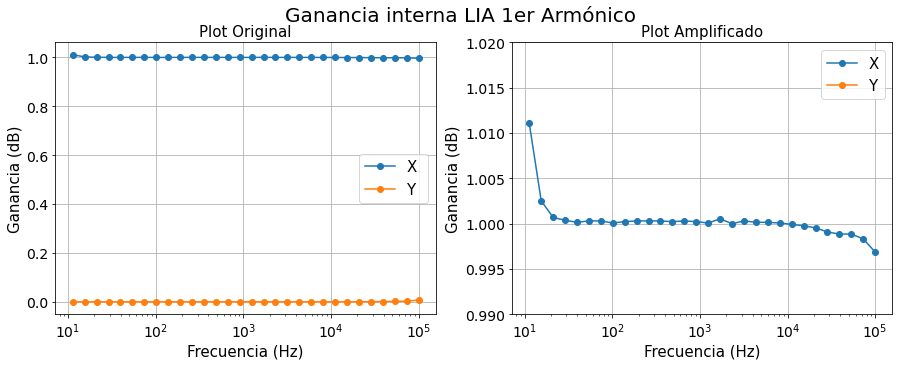

In [5]:


# abro el archivo
df = pd.read_csv(f"data/harm#1/20230626132240_int.txt", sep="\t")
V_in = 0.05


#abro las figuras
f, (a0, a1) = plt.subplots(1, 2, figsize=(15,5))
f.suptitle(f'Ganancia interna LIA 1er Armónico',fontsize = 20)


#ploteo
subplot_figure(a0,'Plot Original','Frecuencia (Hz)','Ganancia (dB)','log')
a0.plot(df['# frequency (Hz)'],df['Voltage_X (V)']/V_in,'-o', label='X ')
a0.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)']/V_in),'-o', label='Y')
a0.legend(fontsize=15)

#zoom
subplot_figure(a1,'Plot Amplificado','Frecuencia (Hz)','Ganancia (dB)','log')
a1.plot(df['# frequency (Hz)'],df['Voltage_X (V)']/V_in,'-o', label='X')
a1.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)'])/V_in,'-o', label='Y')
a1.set_ylim(0.99,1.02)
a1.legend(fontsize=15)


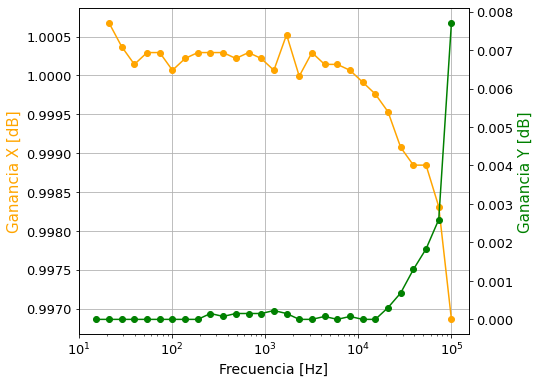

In [7]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(7,6))

ax.grid()
# make a plot
ax.plot(df['# frequency (Hz)'][2:],df['Voltage_X (V)'][2:]/V_in,'-o',color='orange')
ax.set_xlabel("Frecuencia [Hz]", fontsize = 14)
ax.set_xscale('log')
ax.set_ylabel("Ganancia X [dB]",color="orange",fontsize=15)
ax.tick_params(axis='both', labelsize=13)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.tick_params(axis='both', labelsize=13)
# make a plot with different y-axis using second axis object
ax2.plot(df['# frequency (Hz)'][1:],np.abs(df['Voltage_Y (V)'][1:])/V_in,'-o', label='Y',color='green')
ax2.set_ylabel("Ganancia Y [dB]",color="green",fontsize=15)
plt.show()
#save the plot as a file
fig.savefig('LIA_1HARM.jpg', format='jpeg', dpi=1000, bbox_inches='tight')

    
    

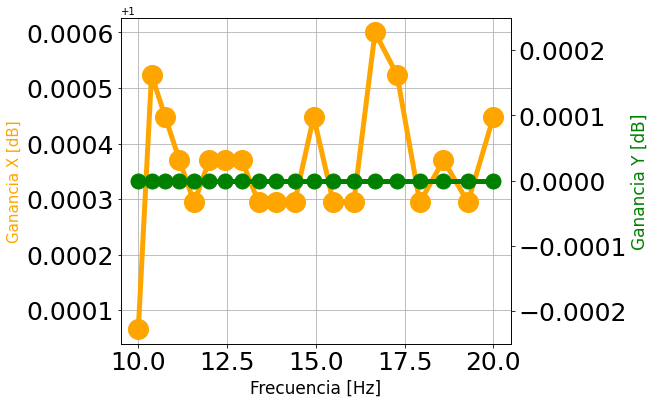

In [19]:
#ploteo un barrido entre 10Hz y 20Hz
# abro el archivo
df = pd.read_csv(f"data/harm#1/20230703103125_int.txt", sep="\t")
V_in = 0.05


# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(7,6))

ax.grid()
# make a plot
ax.plot(df['# frequency (Hz)'],df['Voltage_X (V)']/V_in,'-o',color='orange',ms=20,lw=5)
ax.set_xlabel("Frecuencia [Hz]", fontsize = 17)
#ax.set_xscale('log')
ax.set_ylabel("Ganancia X [dB]",color="orange",fontsize=15)
ax.tick_params(axis='both', labelsize=25)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.tick_params(axis='both', labelsize=25)
ax2.set_ylim(-0.00025,0.00025)
# make a plot with different y-axis using second axis object
ax2.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)'])/V_in,'-o', label='Y',color='green',ms=15,lw=5)
ax2.set_ylabel("Ganancia Y [dB]",color="green",fontsize=17)
plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg', format='jpeg', dpi=100, bbox_inches='tight')

    
    


### Medición B

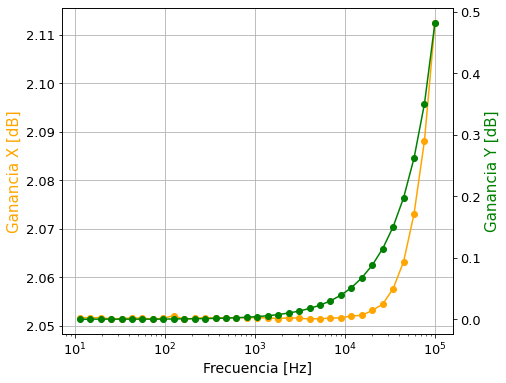

In [88]:
# abro el archivo
df = pd.read_csv(f"data/harm#1/20230626130737.txt", sep="\t")
V_in = 0.05


# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(7,6))

ax.grid()
# make a plot
ax.plot(df['# frequency (Hz)'],df['Voltage_X (V)']/V_in,'-o',color='orange')
ax.set_xlabel("Frecuencia [Hz]", fontsize = 14)
ax.set_xscale('log')
ax.set_ylabel("Ganancia X [dB]",color="orange",fontsize=15)
ax.tick_params(axis='both', labelsize=13)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.tick_params(axis='both', labelsize=13)
#ax2.set_ylim(-0.00025,0.00025)
# make a plot with different y-axis using second axis object
ax2.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)'])/V_in,'-o', label='Y',color='green')
ax2.set_ylabel("Ganancia Y [dB]",color="green",fontsize=15)
plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg', format='jpeg', dpi=100, bbox_inches='tight')

    



## Segundo Armonico
### Medición A

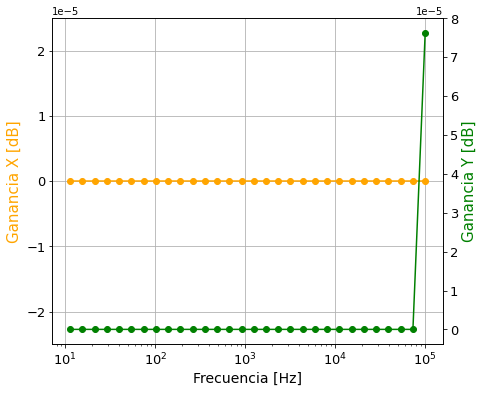

In [30]:


# abro el archivo
df = pd.read_csv(f"data/harm#2/20230628095234_int.txt", sep="\t")
V_in = 0.05

#ploteo
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(7,6))

ax.grid()
# make a plot
ax.plot(df['# frequency (Hz)'],df['Voltage_X (V) ']/V_in,'-o',color='orange')
ax.set_xlabel("Frecuencia [Hz]", fontsize = 14)
ax.set_xscale('log')
ax.set_ylabel("Ganancia X [dB]",color="orange",fontsize=15)
ax.tick_params(axis='both', labelsize=13)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.tick_params(axis='both', labelsize=13)
ax.set_ylim(-0.000025,0.000025)
# make a plot with different y-axis using second axis object
ax2.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)'])/V_in,'-o', label='Y',color='green')
ax2.set_ylabel("Ganancia Y [dB]",color="green",fontsize=15)
plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg', format='jpeg', dpi=100, bbox_inches='tight')
fig.savefig('A_2harm.jpg', format='jpeg', dpi=1000, bbox_inches='tight')


### Medición B

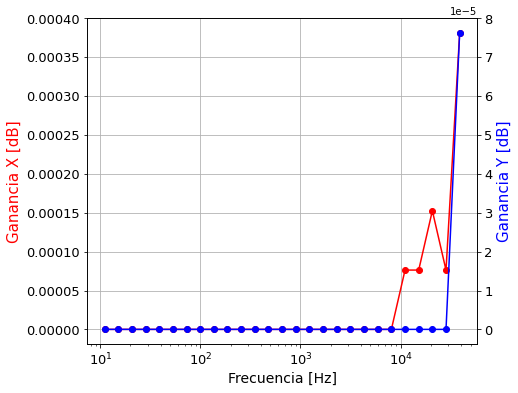

In [46]:


# abro el archivo
df = pd.read_csv(f"data/harm#2/20230628093600.txt", sep="\t")
V_in = 0.05

#ploteo
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(7,6))

ax.grid()
# make a plot
ax.plot(df['# frequency (Hz)'],df['Voltage_X (V) ']/V_in,'-o',color='red')
ax.set_xlabel("Frecuencia [Hz]", fontsize = 14)
ax.set_xscale('log')
ax.set_ylabel("Ganancia X [dB]",color="red",fontsize=15)
ax.tick_params(axis='both', labelsize=13)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.tick_params(axis='both', labelsize=13)
#ax2.set_ylim(-0.00025,0.00025)
# make a plot with different y-axis using second axis object
ax2.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)'])/V_in,'-o', label='Y',color='blue')
ax2.set_ylabel("Ganancia Y [dB]",color="blue",fontsize=15)
plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg', format='jpeg', dpi=100, bbox_inches='tight')

    


### Calculando la frecuencia en donde el amplificador no responde como se espera

Calculamos la media movil simple, si es mayor a la media movil cumulativa + el error (std), ya tomo como que sla respuetsa es mala

In [132]:
df = 0

In [26]:
df = pd.read_csv(f"data/harm#1/20230626130737.txt", sep="\t")

df['Voltage_R (V)'] = np.sqrt(df['Voltage_X (V)']**2 + df['Voltage_Y (V)']**2)    
df['SMA_X_5'] = df['Voltage_X (V)'].rolling(5).mean()
df['SMA_Y_5'] = df['Voltage_Y (V)'].rolling(5).mean()
df['SMA_R_5'] = df['Voltage_R (V)'].rolling(5).mean()

#cma
df['CMA_X_5'] = df['Voltage_X (V)'].expanding().mean()
df['CMA_Y_5'] = df['Voltage_Y (V)'].expanding().mean()
df['CMA_R_5'] = df['Voltage_Y (V)'].expanding().mean()

#std
df['STD_X_5'] = df['Voltage_X (V)'].expanding().std()
df['STD_Y_5'] = df['Voltage_Y (V)'].expanding().std()
df['STD_R_5'] = df['Voltage_R (V)'].expanding().std()

#df['STD_X_5'] = df['Voltage_X (V)'].std()
#df['STD_Y_5'] = df['Voltage_Y (V)'].std()
#df['STD_R_5'] = df['Voltage_R (V)'].std()

fr_x = []
fr_y = []
fr_r = []

for i,row in enumerate(df.iloc):
    std_x = row['STD_X_5']
    cma_x = row['CMA_X_5']
    sma_x = row['SMA_X_5']
    
    std_y = row['STD_Y_5']
    cma_y = row['CMA_Y_5']
    sma_y = row['SMA_Y_5']

    std_r = row['STD_R_5']
    cma_r = row['CMA_R_5']
    sma_r = row['SMA_R_5']

    if cma_x+std_x/2 < sma_x: 
        fr_x.append(row['# frequency (Hz)'])
        fr_r.append(df.iloc[i-1]['# frequency (Hz)'])
        
    if np.abs(cma_y)+np.abs(std_y)*np.sqrt(2)< np.abs(sma_y): 
        fr_y.append(row['# frequency (Hz)'])
        
    #if np.abs(cma_r)+std_r/100 < np.abs(sma_r): 
        #print(std_r,cma_r,sma_r)
        #fr_r.append(row['# frequency (Hz)'])


15395.667 1388.7534 11784.538


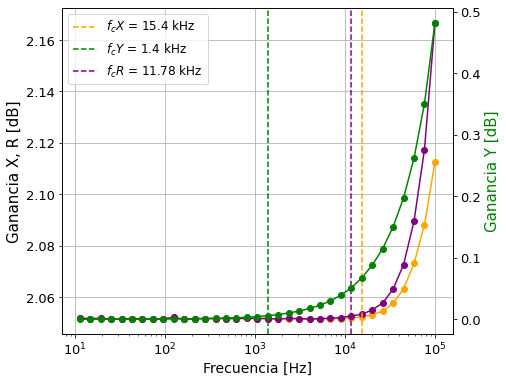

In [27]:
%matplotlib inline

#ploteo
fig,ax = plt.subplots(figsize=(7,6))

ax.grid()
# make a plot
ax.plot(df['# frequency (Hz)'],df['Voltage_X (V)']/V_in,'-o',color='orange')
ax.plot(df['# frequency (Hz)'],df['Voltage_R (V)']/V_in,'-o',color='purple')
ax.set_xlabel("Frecuencia [Hz]", fontsize = 14)
ax.set_xscale('log')
#ax.set_ylabel("Ganancia X [dB]",color="orange",fontsize=15)
ax.set_ylabel("Ganancia X, R [dB]",fontsize=15)
ax.tick_params(axis='both', labelsize=13)

print(fr_x[0],fr_y[0],fr_r[0])
ax.axvline(fr_x[0],ls='--',color='orange',label=f'$f_c X$ = {round(fr_x[0]/1000,1)} kHz')
ax.axvline(fr_y[0],ls='--',color='green',label=f'$f_c Y$ = {round(fr_y[0]/1000,1)} kHz')
ax.axvline(fr_r[0],ls='--',color='purple',label=f'$f_c R$ = {round(fr_r[0]/1000,2)} kHz')
ax.legend(fontsize=12)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.tick_params(axis='both', labelsize=13)
#ax2.set_ylim(-0.00025,0.00025)
# make a plot with different y-axis using second axis object
ax2.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)'])/V_in,'-o', label='Y',color='green')
ax2.set_ylabel("Ganancia Y [dB]",color="green",fontsize=15)
plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg', format='jpeg', dpi=100, bbox_inches='tight')

        #print(row[['# frequency (Hz)', 'Voltage_X (V) ']])
#plt.plot(fr,np.array(volt)/V_in,'-o')
fig.savefig('3.jpg', format='jpeg', dpi=1000, bbox_inches='tight')

#print(fr[0])

# 2do armonico

In [28]:
df = pd.read_csv(f"data/harm#2/20230628093600.txt", sep="\t")

df['Voltage_R (V)'] = np.sqrt(df['Voltage_X (V) ']**2 + df['Voltage_Y (V)']**2)    
df['SMA_X_5'] = df['Voltage_X (V) '].rolling(5).mean()
df['SMA_Y_5'] = df['Voltage_Y (V)'].rolling(5).mean()
df['SMA_R_5'] = df['Voltage_R (V)'].rolling(5).mean()

#cma
df['CMA_X_5'] = df['Voltage_X (V) '].expanding().mean()
df['CMA_Y_5'] = df['Voltage_Y (V)'].expanding().mean()
df['CMA_R_5'] = df['Voltage_Y (V)'].expanding().mean()

#std
df['STD_X_5'] = df['Voltage_X (V) '].expanding().std()
df['STD_Y_5'] = df['Voltage_Y (V)'].expanding().std()
df['STD_R_5'] = df['Voltage_R (V)'].expanding().std()

#df['STD_X_5'] = df['Voltage_X (V)'].std()
#df['STD_Y_5'] = df['Voltage_Y (V)'].std()
#df['STD_R_5'] = df['Voltage_R (V)'].std()

fr_x = []
fr_y = []
fr_r = []

for i,row in enumerate(df.iloc):
    std_x = row['STD_X_5']
    cma_x = row['CMA_X_5']
    sma_x = row['SMA_X_5']
    
    std_y = row['STD_Y_5']
    cma_y = row['CMA_Y_5']
    sma_y = row['SMA_Y_5']

    std_r = row['STD_R_5']
    cma_r = row['CMA_R_5']
    sma_r = row['SMA_R_5']

    if cma_x+std_x/2 < sma_x: 
        fr_x.append(row['# frequency (Hz)'])
        fr_r.append(df.iloc[i-1]['# frequency (Hz)'])
        
    if np.abs(cma_y)+np.abs(std_y)/2< np.abs(sma_y): 
        fr_y.append(row['# frequency (Hz)'])
        
    #if np.abs(cma_r)+std_r/100 < np.abs(sma_r): 
        #print(std_r,cma_r,sma_r)
        #fr_r.append(row['# frequency (Hz)'])
print(fr_x,fr_y,fr_r)

[11085.694, 15178.399, 20782.081, 28454.574, 38959.66] [38959.66] [8096.5469, 11085.694, 15178.399, 20782.081, 28454.574]


11085.694 38959.66 8096.5469


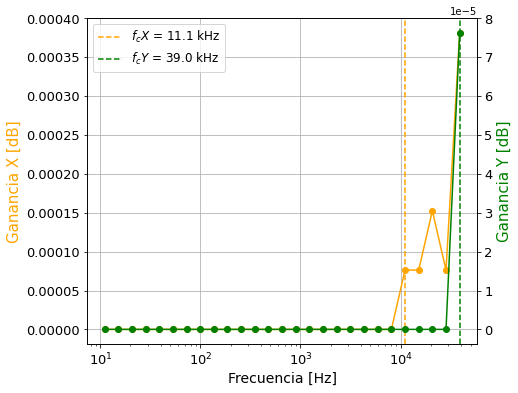

In [29]:
%matplotlib inline

#ploteo
fig,ax = plt.subplots(figsize=(7,6))

ax.grid()
# make a plot
ax.plot(df['# frequency (Hz)'],df['Voltage_X (V) ']/V_in,'-o',color='orange')
#ax.plot(df['# frequency (Hz)'],df['Voltage_R (V)']/V_in,'-o',color='purple')
ax.set_xlabel("Frecuencia [Hz]", fontsize = 14)
ax.set_xscale('log')
ax.set_ylabel("Ganancia X [dB]",color="orange",fontsize=15)
ax.tick_params(axis='both', labelsize=13)

print(fr_x[0],fr_y[0],fr_r[0])
ax.axvline(fr_x[0],ls='--',color='orange',label=f'$f_c X$ = {round(fr_x[0]/1000,1)} kHz')
ax.axvline(fr_y[0],ls='--',color='green',label=f'$f_c Y$ = {round(fr_y[0]/1000,1)} kHz')
#ax.axvline(fr_r[0],ls='--',color='purple',label=f'$f_c R$ = {round(fr_r[0]/1000,2)} kHz')
ax.legend(fontsize=12)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
ax2.tick_params(axis='both', labelsize=13)
#ax2.set_ylim(-0.00025,0.00025)
# make a plot with different y-axis using second axis object
ax2.plot(df['# frequency (Hz)'],np.abs(df['Voltage_Y (V)'])/V_in,'-o', label='Y',color='green')
ax2.set_ylabel("Ganancia Y [dB]",color="green",fontsize=15)
plt.show()
# save the plot as a file
#fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg', format='jpeg', dpi=100, bbox_inches='tight')

        #print(row[['# frequency (Hz)', 'Voltage_X (V) ']])
#plt.plot(fr,np.array(volt)/V_in,'-o')
fig.savefig('4.jpg', format='jpeg', dpi=1000, bbox_inches='tight')